In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt









In [4]:
file1= "/mount/IFG/data/generated_responses/reddit_comments/re_evals/qwen3-4b/Qwen2.5-7B/ifg_0.5_0.3/comments_rse.json"
file2 = "/mount/IFG/data/generated_responses/reddit_comments/Qwen2.5-7B/ifg_0.5_0.3/comments.json"

import json

with open(file1, "r") as f:
    data1 = json.load(f)

with open(file2, "r") as f:
    data2 = json.load(f)


print(len(data1))

1


Pearson correlation coefficient: 0.068
P-value: 5.019e-01


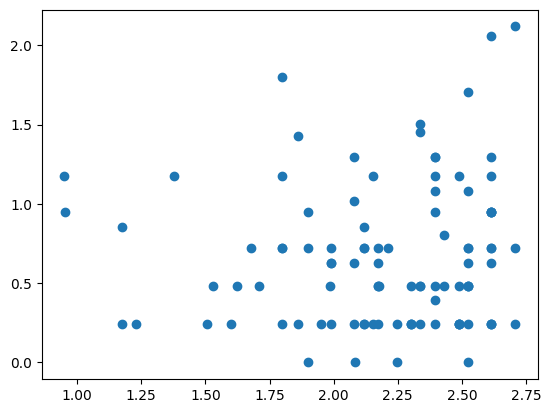

In [10]:
plt.scatter(data1['keywords']['entropies'], data2['keywords']['entropies'])

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(data1['keywords']['entropies'], data2['keywords']['entropies'])
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")










In [15]:
data1['keywords']['mean_entropy'], data2['keywords']['mean_entropy']












(2.1908192591797353, 0.666872773712071)